#CHE1148: Process Data Analytics

##Assignment 5

###**Name: Ashutosh Desai**
###**Student number: 1004774041**

In [ ]:
# Import libraries and settings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (8, 8)
matplotlib.rcParams.update({'font.size': 16})
import seaborn as sns
from sklearn import svm

In [ ]:
link = 'https://raw.githubusercontent.com/ashutoshdesai/processdata_a4/main/Carbig.csv'
df = pd.read_csv(link)
df

,Acceleration,Cylinders,Displacement,Horsepower,MPG,Weight
0,12.0,8.0,307.0,130.0,18.0,3500.0
1,11.5,8.0,350.0,165.0,15.0,3690.0
2,11.0,8.0,318.0,150.0,18.0,3440.0
3,12.0,8.0,304.0,150.0,16.0,3430.0
4,10.5,8.0,302.0,140.0,17.0,3450.0
...,...,...,...,...,...,...
401,15.6,4.0,140.0,86.0,27.0,2790.0
402,24.6,4.0,97.0,52.0,44.0,2130.0
403,11.6,4.0,135.0,84.0,32.0,2300.0
404,18.6,4.0,120.0,79.0,28.0,2630.0


Dataframe 'df' contains complete, non-processed data with dimensions (406*6)

In [ ]:
#Preprocess and sort this data and then explore different ways of displaying this data. Separate or segment the data so that you have all the features for 4, 6 and 8 cylinder cars.
#Eliminating other classes except 4,5 and 6
indexNames = df[(df['Cylinders'] == 3.0)].index
df.drop(indexNames,inplace=True)
indexNames = df[(df['Cylinders'] == 5.0)].index
df.drop(indexNames,inplace=True)
#df = df.dropna(how='any',axis=0)
df

,Acceleration,Cylinders,Displacement,Horsepower,MPG,Weight
0,12.0,8.0,307.0,130.0,18.0,3500.0
1,11.5,8.0,350.0,165.0,15.0,3690.0
2,11.0,8.0,318.0,150.0,18.0,3440.0
3,12.0,8.0,304.0,150.0,16.0,3430.0
4,10.5,8.0,302.0,140.0,17.0,3450.0
...,...,...,...,...,...,...
401,15.6,4.0,140.0,86.0,27.0,2790.0
402,24.6,4.0,97.0,52.0,44.0,2130.0
403,11.6,4.0,135.0,84.0,32.0,2300.0
404,18.6,4.0,120.0,79.0,28.0,2630.0


This is the first part of pre-processing the data. Here, the rows having 'Cylinders' value other than 4,6 and 8 are removed from the dataset.

In [ ]:
print('Data with 4 cylinders :',len(df[df['Cylinders'] == 4.0]))
print('Data with 6 cylinders :',len(df[df['Cylinders'] == 6.0]))
print('Data with 8 cylinders :',len(df[df['Cylinders'] == 8.0]))
print('Total data :',(len(df[df['Cylinders'] == 4.0])+len(df[df['Cylinders'] == 6.0])+len(df[df['Cylinders'] == 8.0])))

Data with 4 cylinders : 207
Data with 6 cylinders : 84
Data with 8 cylinders : 108
Total data : 399


The results shown above display an important characterstic about the dataset. 
*   4 cylinder data = **52%**
*   6 cylinder data = **21%**
*   8 cylinder data = **27%**

This shows that the dataset is **'well-balanced'** and the predictive performance will be better and shall have robust results.

In [ ]:
#Splitting the data into it's classes
df_4 = df[df['Cylinders'] == 4.0]
df_6 = df[df['Cylinders'] == 6.0]
df_8 = df[df['Cylinders'] == 8.0]

In [ ]:
print('NaN values are present in the dataset: ',df.isnull().values.any())

NaN values are present in the dataset:  True


In [ ]:
#Replacing NaN values with mean of each class
col_names = ['Acceleration','Displacement','Horsepower','MPG','Weight']
for i in col_names:
  df_4[i] = df_4[i].replace(np.nan, np.mean(df_4[i]))
  df_6[i] = df_6[i].replace(np.nan, np.mean(df_6[i]))
  df_8[i] = df_8[i].replace(np.nan, np.mean(df_8[i]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

This is the final step of pre-processing where the NaN values are replaced with the mean values of that particular class, that data (row) belongs to. This method allows us to preserve the valuable data rather than eliminating it.

In [ ]:
#Visualization
df = pd.concat([df_4,df_6,df_8])
df

,Acceleration,Cylinders,Displacement,Horsepower,MPG,Weight
10,17.5,4.0,133.0,115.0,29.286765,3090.0
20,15.0,4.0,113.0,95.0,24.000000,2370.0
24,14.5,4.0,97.0,88.0,27.000000,2130.0
25,20.5,4.0,97.0,46.0,26.000000,1840.0
26,17.5,4.0,110.0,87.0,25.000000,2670.0
...,...,...,...,...,...,...
298,15.0,8.0,267.0,125.0,19.200000,3610.0
299,13.0,8.0,360.0,150.0,18.500000,3940.0
305,17.4,8.0,350.0,125.0,23.000000,3900.0
307,22.2,8.0,260.0,90.0,23.900000,3420.0


In [ ]:
print('NaN values are present in the dataset: ',df.isnull().values.any())

NaN values are present in the dataset:  False


Correlation Matrix (features and output): 



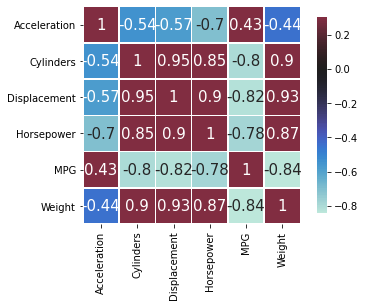

In [ ]:
corr = df.corr()
print('Correlation Matrix (features and output): \n')
heat = sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9}, annot=True, annot_kws={"size":15})

According to the second row of the correlation matrix, the features, **Displacement, Horsepower and Weight** have the highest correlation.

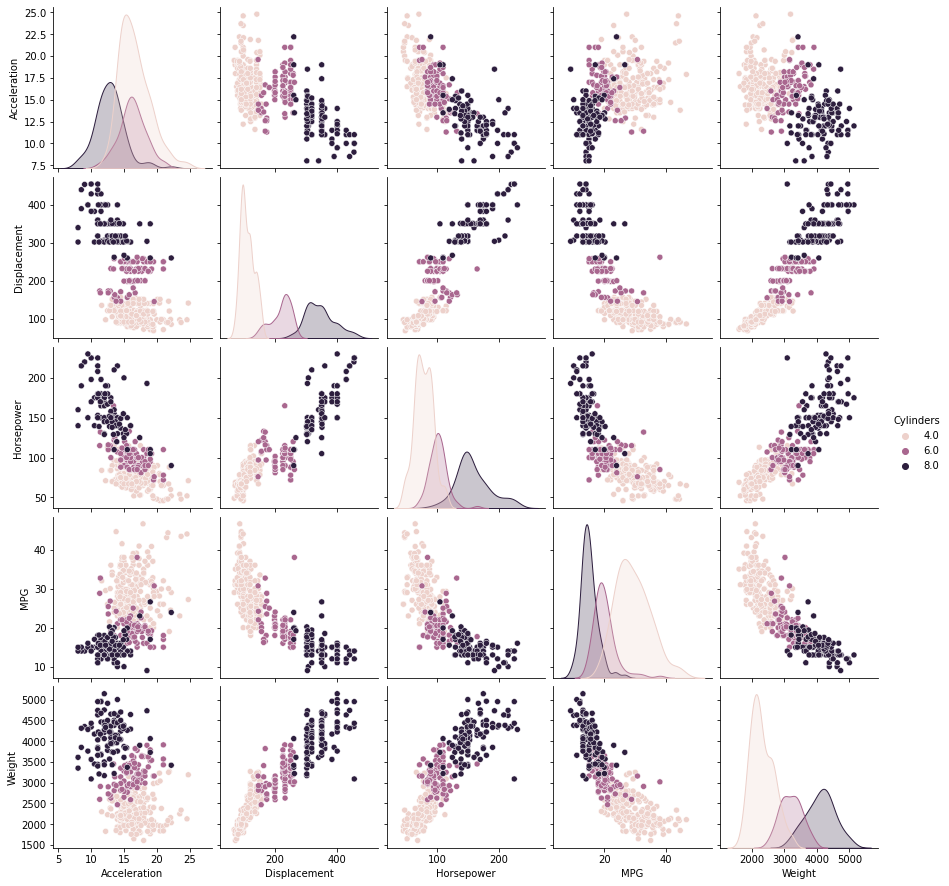

In [ ]:
sns.pairplot(df, hue="Cylinders")

The pairplot furthur proves that Acceleration is not a good feature for efficient class separation.

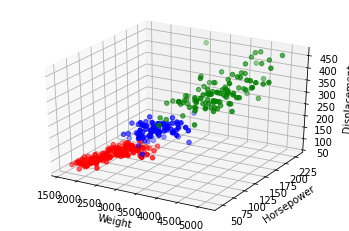

In [ ]:
#Visualization 
#3-D plot of 3 features including class distinction
X_4 = df_4.drop(columns=['Cylinders'])
X_6 = df_6.drop(columns=['Cylinders'])
X_8 = df_8.drop(columns=['Cylinders'])

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = ('red','o',X_4['Weight'],X_4['Horsepower'],X_4['Displacement'])
x2 = ('blue','o',X_6['Weight'],X_6['Horsepower'],X_6['Displacement'])
x3 = ('green','o',X_8['Weight'],X_8['Horsepower'],X_8['Displacement'])
for c, m, xa, xb, xc in [x1,x2,x3]:
  ax.scatter(c=c, marker = m,xs= xa,ys= xb,zs= xc)

ax.set_xlabel('Weight')
ax.set_ylabel('Horsepower')
ax.set_zlabel('Displacement')

plt.show()

The 3-D plot visualization shows that **Weight, Horsepower and Displacement** show efficient class distinction and this data shall be used for Classification and Regression analysis.

In [ ]:
#The train and test set splits are perforrmed to maintain a 'well-balanced' dataset in both training and testing data.
y = df['Cylinders']
X = df.copy()
X.drop(columns=['Acceleration'],inplace=True)
X.drop(columns=['MPG'],inplace=True)
X.drop(columns=['Cylinders'],inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100,stratify=y) #80:20 split for complete data
#X_train.shape

In [ ]:
#Standardize the data
scaler = StandardScaler().fit(X_train) #scaler based on fitting X-train
X_train_scaled = scaler.transform(X_train) #scaling X-train
X_test_scaled = scaler.transform(X_test) #scaling X-test
#X_test_scaled.shape
#X_train_scaled.shape

##A.) CLASSIFICATION (SUPERVISED LEARNING)



###1.) Logistic Regression (Model-1)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

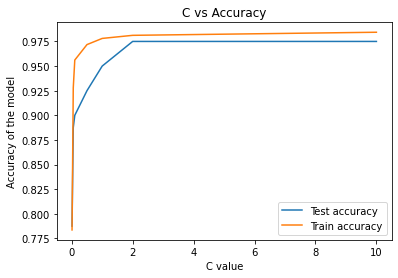

In [ ]:
C_logreg = [0.01,0.05,0.1,0.5,1.0,2,10]
acc1a = []
acc1b = []
for i in range(len(C_logreg)):
  LogReg = LogisticRegression(C = C_logreg[i],dual=False)
  LogReg.fit(X_train_scaled, y_train)

  y_test_predicted_logreg = LogReg.predict(X_test_scaled)
  y_train_predicted_logreg = LogReg.predict(X_train_scaled)
  
  acc_score_logreg1 = accuracy_score(y_test, y_test_predicted_logreg, normalize = True)
  acc_score_logreg2 = accuracy_score(y_train, y_train_predicted_logreg, normalize = True)
  
  acc1a.append(acc_score_logreg1)
  acc1b.append(acc_score_logreg2)

plt.xlabel('C value')
plt.ylabel('Accuracy of the model')
plt.title('C vs Accuracy')
plt.plot(C_logreg,acc1a,label='Test accuracy')
plt.plot(C_logreg,acc1b,label='Train accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


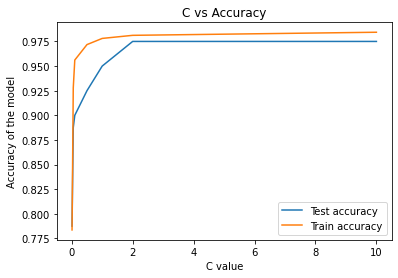

In [ ]:
C_logreg = [0.01,0.05,0.1,0.5,1.0,2,10]
acc1a = []
acc1b = []
for i in range(len(C_logreg)):
  LogReg = LogisticRegression(C = C_logreg[i],solver='sag',random_state=0,dual=False)
  LogReg.fit(X_train_scaled, y_train)

  y_test_predicted_logreg = LogReg.predict(X_test_scaled)
  y_train_predicted_logreg = LogReg.predict(X_train_scaled)
  
  acc_score_logreg1 = accuracy_score(y_test, y_test_predicted_logreg, normalize = True)
  acc_score_logreg2 = accuracy_score(y_train, y_train_predicted_logreg, normalize = True)
  
  acc1a.append(acc_score_logreg1)
  acc1b.append(acc_score_logreg2)

plt.xlabel('C value')
plt.ylabel('Accuracy of the model')
plt.title('C vs Accuracy')
plt.plot(C_logreg,acc1a,label='Test accuracy')
plt.plot(C_logreg,acc1b,label='Train accuracy')
plt.legend()
plt.show()

In [ ]:
#Model 1 - Logistic Regression
LogReg = LogisticRegression(C=2,dual=False)
LogReg.fit(X_train_scaled, y_train)

y_test_predicted_logreg = LogReg.predict(X_test_scaled)
print('Predicted values for Logistic regerssion model: \n',y_test_predicted_logreg)

unique_elements, counts_elements = np.unique(y_test_predicted_logreg, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

cm_logreg = confusion_matrix(y_test, y_test_predicted_logreg)
print('Confusion Matrix for Logistic Regression model: \n',cm_logreg)

cr_logreg = classification_report(y_test, y_test_predicted_logreg, target_names = ['4', '6','8'])
print('Classification Report for Logistic Regression model: \n',cr_logreg)

acc_score_logreg = accuracy_score(y_test, y_test_predicted_logreg, normalize = True) * 100
print('Accuracy score for Logistic Regression model: ',acc_score_logreg)


Predicted values for Logistic regerssion model: 
 [4. 4. 6. 4. 6. 4. 4. 4. 4. 4. 4. 4. 4. 8. 8. 4. 6. 4. 8. 8. 8. 6. 6. 8.
 4. 8. 6. 4. 4. 4. 6. 8. 6. 6. 6. 4. 4. 4. 4. 8. 4. 4. 8. 8. 4. 8. 4. 8.
 8. 8. 4. 4. 4. 6. 4. 8. 4. 6. 4. 6. 6. 4. 4. 4. 8. 4. 4. 4. 8. 6. 8. 4.
 6. 4. 8. 4. 8. 4. 6. 4.]
Frequency of unique values of the said array:
[[ 4.  6.  8.]
 [42. 17. 21.]]
Confusion Matrix for Logistic Regression model: 
 [[41  0  0]
 [ 1 16  0]
 [ 0  1 21]]
Classification Report for Logistic Regression model: 
               precision    recall  f1-score   support

           4       0.98      1.00      0.99        41
           6       0.94      0.94      0.94        17
           8       1.00      0.95      0.98        22

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80

Accuracy score for Logistic Regression model:  97.5


In [ ]:
#Model 1 - Logistic Regression
LogReg = LogisticRegression(dual=False)
LogReg.fit(X_train_scaled, y_train)

y_test_predicted_logreg = LogReg.predict(X_test_scaled)
print('Predicted values for Logistic regerssion model: \n',y_test_predicted_logreg)

unique_elements, counts_elements = np.unique(y_test_predicted_logreg, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

cm_logreg = confusion_matrix(y_test, y_test_predicted_logreg)
print('Confusion Matrix for Logistic Regression model: \n',cm_logreg)

cr_logreg = classification_report(y_test, y_test_predicted_logreg, target_names = ['4', '6','8'])
print('Classification Report for Logistic Regression model: \n',cr_logreg)

acc_score_logreg = accuracy_score(y_test, y_test_predicted_logreg, normalize = True) * 100
print('Accuracy score for Logistic Regression model: ',acc_score_logreg)

Predicted values for Logistic regerssion model: 
 [4. 4. 6. 4. 6. 4. 4. 4. 4. 4. 4. 4. 4. 8. 8. 4. 6. 4. 8. 8. 8. 6. 6. 8.
 4. 8. 4. 4. 4. 4. 6. 8. 4. 6. 6. 4. 4. 4. 4. 8. 4. 4. 8. 8. 4. 8. 4. 8.
 8. 8. 4. 4. 4. 6. 4. 8. 4. 6. 4. 6. 6. 4. 4. 4. 8. 4. 4. 4. 8. 6. 8. 4.
 6. 4. 8. 4. 8. 4. 6. 4.]
Frequency of unique values of the said array:
[[ 4.  6.  8.]
 [44. 15. 21.]]
Confusion Matrix for Logistic Regression model: 
 [[41  0  0]
 [ 3 14  0]
 [ 0  1 21]]
Classification Report for Logistic Regression model: 
               precision    recall  f1-score   support

           4       0.93      1.00      0.96        41
           6       0.93      0.82      0.87        17
           8       1.00      0.95      0.98        22

    accuracy                           0.95        80
   macro avg       0.96      0.93      0.94        80
weighted avg       0.95      0.95      0.95        80

Accuracy score for Logistic Regression model:  95.0


*Parameter justification:*

1. Two solvers, namely, 'sag' and 'lbgs' did not affect the accuracy drastically.
2. Multiple C values were used and we can infer that greater the value of C, lesser is the regularization and greater is the accuracy.
3. fit_intercept is true as we need the value of **'b'**
4. Dual formulation is only implemented for l2 penalty with liblinear solver. Prefer **dual=False** when n_samples > n_features.
5. The ‘newton-cg’, ‘sag’ and **‘lbfgs’** solvers support only **l2** penalties.

###2.) Support vector machine (SVM) 

####a.) Linear Support Vector Classification (Model-2)

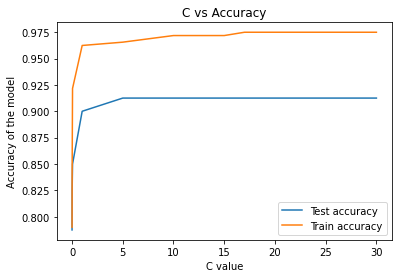

In [ ]:
C_lsvr = [0.001,0.01,0.05,1.0,5.0,10,11,15,17,18,19,20,21,22,23,24,25,30]
acc2a = []
acc2b = []
for i in range(len(C_lsvr)):
  linear_svc = svm.LinearSVC(C=C_lsvr[i],random_state=0,max_iter=50000)
  linear_svc.fit(X_train_scaled,y_train)

  y_test_predicted_lin_svc = linear_svc.predict(X_test_scaled)
  y_train_predicted_lin_svc = linear_svc.predict(X_train_scaled) 
  
  acc_score_lin_svc1 = accuracy_score(y_test, y_test_predicted_lin_svc, normalize = True)
  acc_score_lin_svc2 = accuracy_score(y_train, y_train_predicted_lin_svc, normalize = True)
  
  acc2a.append(acc_score_lin_svc1)
  acc2b.append(acc_score_lin_svc2)
plt.xlabel('C value')
plt.ylabel('Accuracy of the model')
plt.title('C vs Accuracy')
plt.plot(C_lsvr,acc2a,label='Test accuracy')
plt.plot(C_lsvr,acc2b,label='Train accuracy')
plt.legend()
plt.show()

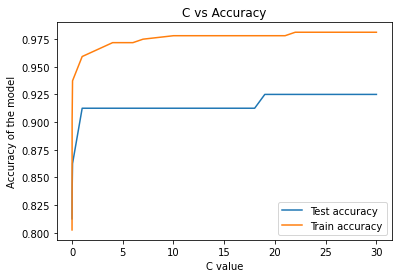

In [ ]:
C_lsvr = [0.001,0.01,0.05,1.0,4,5.0,6,7,10,11,15,17,18,19,20,21,22,23,24,25,30]
acc2a = []
acc2b = []
for i in range(len(C_lsvr)):
  linear_svc = svm.LinearSVC(C=C_lsvr[i],dual=False,max_iter=50000,class_weight='balanced')
  linear_svc.fit(X_train_scaled,y_train)

  y_test_predicted_lin_svc = linear_svc.predict(X_test_scaled)
  y_train_predicted_lin_svc = linear_svc.predict(X_train_scaled) 
  
  acc_score_lin_svc1 = accuracy_score(y_test, y_test_predicted_lin_svc, normalize = True)
  acc_score_lin_svc2 = accuracy_score(y_train, y_train_predicted_lin_svc, normalize = True)
  
  acc2a.append(acc_score_lin_svc1)
  acc2b.append(acc_score_lin_svc2)
plt.xlabel('C value')
plt.ylabel('Accuracy of the model')
plt.title('C vs Accuracy')
plt.plot(C_lsvr,acc2a,label='Test accuracy')
plt.plot(C_lsvr,acc2b,label='Train accuracy')
plt.legend()
plt.show()

In [ ]:
#Model 2 - Linear SVC

linear_svc = svm.LinearSVC(C=5,dual=False,max_iter=50000,class_weight='balanced')
linear_svc.fit(X_train_scaled,y_train)

y_test_predicted_lin_svc = linear_svc.predict(X_test_scaled)
print('Predicted values for Linear SVC model: \n',y_test_predicted_lin_svc)

cm_lin_svc = confusion_matrix(y_test, y_test_predicted_lin_svc)
print('Confusion matrix for Linear SVC model: \n',cm_lin_svc)

#classification report and accuracy score
cr_lin_svc = classification_report(y_test, y_test_predicted_lin_svc, target_names = ['4', '6','8'])
print('Classification Report for Linear SVC model: \n',cr_lin_svc)

acc_score_lin_svc = accuracy_score(y_test, y_test_predicted_lin_svc, normalize = True) * 100
print('Accuracy score for Linear SVC model: ',acc_score_lin_svc)

#ACC_DATA.append(acc_score_lin_svc)

Predicted values for Linear SVC model: 
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 8. 8. 4. 6. 4. 8. 8. 8. 6. 6. 8.
 4. 8. 6. 4. 4. 4. 8. 8. 4. 6. 6. 4. 4. 4. 4. 8. 4. 4. 8. 8. 4. 8. 4. 8.
 8. 8. 4. 4. 4. 6. 4. 8. 4. 6. 4. 6. 6. 4. 4. 4. 8. 4. 4. 4. 8. 8. 8. 4.
 6. 4. 8. 4. 8. 4. 6. 4.]
Confusion matrix for Linear SVC model: 
 [[41  0  0]
 [ 4 11  2]
 [ 0  1 21]]
Classification Report for Linear SVC model: 
               precision    recall  f1-score   support

           4       0.91      1.00      0.95        41
           6       0.92      0.65      0.76        17
           8       0.91      0.95      0.93        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.88        80
weighted avg       0.91      0.91      0.91        80

Accuracy score for Linear SVC model:  91.25


In [ ]:
#Model 2 - Linear SVC

linear_svc = svm.LinearSVC(dual=False,max_iter=50000)
linear_svc.fit(X_train_scaled,y_train)

y_test_predicted_lin_svc = linear_svc.predict(X_test_scaled)
print('Predicted values for Linear SVC model: \n',y_test_predicted_lin_svc)

cm_lin_svc = confusion_matrix(y_test, y_test_predicted_lin_svc)
print('Confusion matrix for Linear SVC model: \n',cm_lin_svc)

#classification report and accuracy score
cr_lin_svc = classification_report(y_test, y_test_predicted_lin_svc, target_names = ['4', '6','8'])
print('Classification Report for Linear SVC model: \n',cr_lin_svc)

acc_score_lin_svc = accuracy_score(y_test, y_test_predicted_lin_svc, normalize = True) * 100
print('Accuracy score for Linear SVC model: ',acc_score_lin_svc)


Predicted values for Linear SVC model: 
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 8. 8. 4. 6. 4. 8. 8. 8. 4. 6. 8.
 4. 8. 6. 4. 4. 4. 8. 8. 4. 6. 6. 4. 4. 4. 4. 8. 4. 4. 8. 8. 4. 8. 4. 8.
 8. 8. 4. 4. 4. 6. 4. 8. 4. 6. 4. 6. 6. 4. 4. 4. 8. 4. 4. 4. 8. 8. 8. 4.
 6. 4. 8. 4. 8. 4. 6. 4.]
Confusion matrix for Linear SVC model: 
 [[41  0  0]
 [ 5 10  2]
 [ 0  1 21]]
Classification Report for Linear SVC model: 
               precision    recall  f1-score   support

           4       0.89      1.00      0.94        41
           6       0.91      0.59      0.71        17
           8       0.91      0.95      0.93        22

    accuracy                           0.90        80
   macro avg       0.90      0.85      0.86        80
weighted avg       0.90      0.90      0.89        80

Accuracy score for Linear SVC model:  90.0


*Parameter justification:*

1. The **‘l2’** penalty is default
2. loss type doesn't make any difference, so default (squared-hinge) is considered.
3. Prefer **dual=False** when n_samples > n_features.
4. With class-weight = balanced, for a lower C (better regularization) , we get a good accuracy.
5.  **"ovr"** trains n_classes one-vs-rest classifiers,'crammer_singer' is seldom used.
6. fit_intercept = True, avalue of 'b' is required.
7. When dual=False the underlying implementation of LinearSVC is **not random** and random_state has no effect on the results.

####b.) C-Support Vector Classification (Model-3)

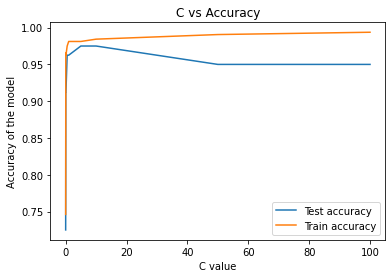

In [ ]:
C_svc = [0.01,0.05,0.1,0.5,1,5,10,50,100]
acc3a = []
acc3b = []
for i in range(len(C_svc)):
  rbf_sv = svm.SVC(C=C_svc[i])
  rbf_sv.fit(X_train_scaled, y_train)

  y_test_predicted_rbf_sv = rbf_sv.predict(X_test_scaled)
  y_train_predicted_rbf_sv = rbf_sv.predict(X_train_scaled)

  acc_score_rbf_sv1 = accuracy_score(y_test, y_test_predicted_rbf_sv, normalize = True)
  acc_score_rbf_sv2 = accuracy_score(y_train, y_train_predicted_rbf_sv, normalize = True)

  acc3a.append(acc_score_rbf_sv1)
  acc3b.append(acc_score_rbf_sv2)

plt.xlabel('C value')
plt.ylabel('Accuracy of the model')
plt.title('C vs Accuracy')
plt.plot(C_svc,acc3a,label='Test accuracy')
plt.plot(C_svc,acc3b,label='Train accuracy')
plt.legend()
plt.show()

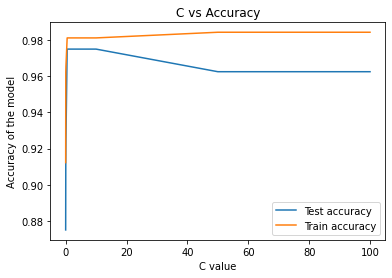

In [ ]:
C_svc = [0.01,0.05,0.1,0.5,1,5,10,50,100]
acc3a = []
acc3b = []
for i in range(len(C_svc)):
  rbf_sv = svm.SVC(C=C_svc[i],kernel='linear')
  rbf_sv.fit(X_train_scaled, y_train)

  y_test_predicted_rbf_sv = rbf_sv.predict(X_test_scaled)
  y_train_predicted_rbf_sv = rbf_sv.predict(X_train_scaled)

  acc_score_rbf_sv1 = accuracy_score(y_test, y_test_predicted_rbf_sv, normalize = True)
  acc_score_rbf_sv2 = accuracy_score(y_train, y_train_predicted_rbf_sv, normalize = True)

  acc3a.append(acc_score_rbf_sv1)
  acc3b.append(acc_score_rbf_sv2)

plt.xlabel('C value')
plt.ylabel('Accuracy of the model')
plt.title('C vs Accuracy')
plt.plot(C_svc,acc3a,label='Test accuracy')
plt.plot(C_svc,acc3b,label='Train accuracy')
plt.legend()
plt.show()

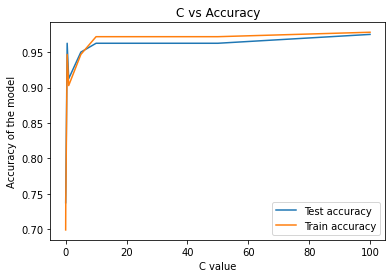

In [ ]:
C_svc = [0.01,0.05,0.1,0.5,1,5,10,50,100]
acc3a = []
acc3b = []
for i in range(len(C_svc)):
  rbf_sv = svm.SVC(C=C_svc[i],kernel='poly')
  rbf_sv.fit(X_train_scaled, y_train)

  y_test_predicted_rbf_sv = rbf_sv.predict(X_test_scaled)
  y_train_predicted_rbf_sv = rbf_sv.predict(X_train_scaled)

  acc_score_rbf_sv1 = accuracy_score(y_test, y_test_predicted_rbf_sv, normalize = True)
  acc_score_rbf_sv2 = accuracy_score(y_train, y_train_predicted_rbf_sv, normalize = True)

  acc3a.append(acc_score_rbf_sv1)
  acc3b.append(acc_score_rbf_sv2)

plt.xlabel('C value')
plt.ylabel('Accuracy of the model')
plt.title('C vs Accuracy')
plt.plot(C_svc,acc3a,label='Test accuracy')
plt.plot(C_svc,acc3b,label='Train accuracy')
plt.legend()
plt.show()

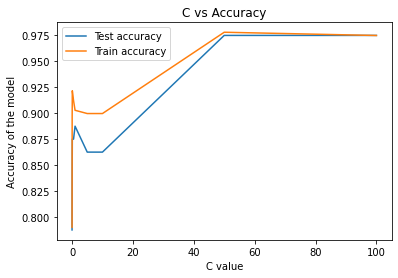

In [ ]:
C_svc = [0.01,0.05,0.1,0.5,1,5,10,50,100]
acc3a = []
acc3b = []
for i in range(len(C_svc)):
  rbf_sv = svm.SVC(C=C_svc[i],kernel='sigmoid')
  rbf_sv.fit(X_train_scaled, y_train)

  y_test_predicted_rbf_sv = rbf_sv.predict(X_test_scaled)
  y_train_predicted_rbf_sv = rbf_sv.predict(X_train_scaled)

  acc_score_rbf_sv1 = accuracy_score(y_test, y_test_predicted_rbf_sv, normalize = True)
  acc_score_rbf_sv2 = accuracy_score(y_train, y_train_predicted_rbf_sv, normalize = True)

  acc3a.append(acc_score_rbf_sv1)
  acc3b.append(acc_score_rbf_sv2)

plt.xlabel('C value')
plt.ylabel('Accuracy of the model')
plt.title('C vs Accuracy')
plt.plot(C_svc,acc3a,label='Test accuracy')
plt.plot(C_svc,acc3b,label='Train accuracy')
plt.legend()
plt.show()

In [ ]:
#Model 3 - C-SVC
rbf_sv = svm.SVC(kernel='rbf')
rbf_sv.fit(X_train_scaled, y_train)

y_test_predicted_rbf_sv = rbf_sv.predict(X_test_scaled)
print('Predicted values for C-SVC model: \n',y_test_predicted_rbf_sv)

cm_rbf_sv = confusion_matrix(y_test, y_test_predicted_rbf_sv)
print('Confusion matrix for C-SVC model: \n',cm_rbf_sv)

#classification report and accuracy score
cr_rbf_sv = classification_report(y_test, y_test_predicted_rbf_sv, target_names = ['4', '6','8'])
print('Classification Report for C-SVC model: \n',cr_rbf_sv)

acc_score_rbf_sv = accuracy_score(y_test, y_test_predicted_rbf_sv, normalize = True) * 100
print('Accuracy score for C-SVC model: ',acc_score_rbf_sv)

Predicted values for C-SVC model: 
 [4. 4. 6. 4. 6. 4. 4. 4. 4. 4. 4. 4. 4. 8. 8. 4. 6. 4. 8. 8. 8. 6. 6. 8.
 4. 8. 6. 4. 4. 4. 6. 8. 4. 6. 6. 4. 4. 4. 4. 8. 4. 4. 8. 8. 4. 8. 4. 8.
 8. 8. 4. 4. 4. 6. 4. 8. 4. 6. 4. 6. 6. 4. 4. 4. 8. 4. 4. 4. 8. 6. 8. 4.
 6. 4. 8. 4. 8. 4. 6. 4.]
Confusion matrix for C-SVC model: 
 [[41  0  0]
 [ 2 15  0]
 [ 0  1 21]]
Classification Report for C-SVC model: 
               precision    recall  f1-score   support

           4       0.95      1.00      0.98        41
           6       0.94      0.88      0.91        17
           8       1.00      0.95      0.98        22

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.95        80
weighted avg       0.96      0.96      0.96        80

Accuracy score for C-SVC model:  96.25


In [ ]:
#Model 3 - C-SVC
rbf_sv = svm.SVC(kernel='linear')
rbf_sv.fit(X_train_scaled, y_train)

y_test_predicted_rbf_sv = rbf_sv.predict(X_test_scaled)
print('Predicted values for C-SVC model: \n',y_test_predicted_rbf_sv)

cm_rbf_sv = confusion_matrix(y_test, y_test_predicted_rbf_sv)
print('Confusion matrix for C-SVC model: \n',cm_rbf_sv)

#classification report and accuracy score
cr_rbf_sv = classification_report(y_test, y_test_predicted_rbf_sv, target_names = ['4', '6','8'])
print('Classification Report for C-SVC model: \n',cr_rbf_sv)

acc_score_rbf_sv = accuracy_score(y_test, y_test_predicted_rbf_sv, normalize = True) * 100
print('Accuracy score for C-SVC model: ',acc_score_rbf_sv)

Predicted values for C-SVC model: 
 [4. 4. 6. 4. 6. 4. 4. 4. 4. 4. 4. 4. 4. 8. 8. 4. 6. 4. 8. 8. 8. 6. 6. 8.
 4. 8. 6. 4. 4. 4. 6. 8. 6. 6. 6. 4. 4. 4. 4. 8. 4. 4. 8. 8. 4. 8. 4. 8.
 8. 8. 4. 4. 4. 6. 4. 8. 4. 6. 4. 6. 6. 4. 4. 4. 8. 4. 4. 4. 8. 6. 8. 4.
 6. 4. 8. 4. 8. 4. 6. 4.]
Confusion matrix for C-SVC model: 
 [[41  0  0]
 [ 1 16  0]
 [ 0  1 21]]
Classification Report for C-SVC model: 
               precision    recall  f1-score   support

           4       0.98      1.00      0.99        41
           6       0.94      0.94      0.94        17
           8       1.00      0.95      0.98        22

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80

Accuracy score for C-SVC model:  97.5


*Parameter justification:*

1. C parameter is varied for multiple kernel types in this model.
2. Keeping the same C-value (default), for 'rbf' and 'linear' kernels, the 'linear' kernel gives a higher training accuracy.

###3.) Classification Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
estimator = DecisionTreeClassifier()
model_dt  = estimator.fit(X_train_scaled, y_train)

y_test_predicted_dt = model_dt.predict(X_test_scaled)
print('Predicted values for Decision Tree classifier model: \n',y_test_predicted_dt)

cm_dt = confusion_matrix(y_test, y_test_predicted_dt)
print('Confusion matrix for Decision Tree classifier model: \n',cm_dt)

#classification report and accuracy score
cr_dt = classification_report(y_test, y_test_predicted_dt, target_names = ['4', '6','8'])
print('Classification Report for Decision Tree classifier model: \n',cr_dt)

acc_score_dt = accuracy_score(y_test, y_test_predicted_dt, normalize = True) * 100
print('Accuracy score for Decision Tree classifier model: ',acc_score_dt)

Predicted values for Decision Tree classifier model: 
 [4. 4. 6. 4. 6. 4. 4. 4. 4. 4. 4. 4. 4. 8. 8. 4. 6. 4. 8. 8. 8. 6. 6. 8.
 4. 8. 6. 4. 4. 4. 6. 8. 4. 6. 6. 4. 4. 4. 4. 8. 4. 4. 8. 8. 4. 8. 4. 8.
 8. 8. 4. 4. 4. 6. 4. 8. 4. 6. 4. 6. 6. 4. 4. 4. 8. 4. 4. 4. 8. 6. 8. 4.
 8. 4. 8. 4. 8. 4. 6. 4.]
Confusion matrix for Decision Tree classifier model: 
 [[41  0  0]
 [ 2 15  0]
 [ 0  0 22]]
Classification Report for Decision Tree classifier model: 
               precision    recall  f1-score   support

           4       0.95      1.00      0.98        41
           6       1.00      0.88      0.94        17
           8       1.00      1.00      1.00        22

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80

Accuracy score for Decision Tree classifier model:  97.5


In [ ]:
estimator = DecisionTreeClassifier(criterion='entropy')
model_dt  = estimator.fit(X_train_scaled, y_train)

y_test_predicted_dt = model_dt.predict(X_test_scaled)
print('Predicted values for Decision Tree classifier model: \n',y_test_predicted_dt)

cm_dt = confusion_matrix(y_test, y_test_predicted_dt)
print('Confusion matrix for Decision Tree classifier model: \n',cm_dt)

#classification report and accuracy score
cr_dt = classification_report(y_test, y_test_predicted_dt, target_names = ['4', '6','8'])
print('Classification Report for Decision Tree classifier model: \n',cr_dt)

acc_score_dt = accuracy_score(y_test, y_test_predicted_dt, normalize = True) * 100
print('Accuracy score for Decision Tree classifier model: ',acc_score_dt)

Predicted values for Decision Tree classifier model: 
 [4. 4. 6. 4. 6. 4. 4. 4. 4. 4. 4. 4. 4. 8. 8. 4. 6. 4. 8. 8. 8. 6. 6. 8.
 4. 8. 6. 4. 4. 4. 6. 8. 6. 6. 6. 4. 4. 4. 4. 8. 4. 4. 8. 8. 4. 8. 4. 8.
 8. 8. 4. 4. 4. 6. 4. 8. 4. 6. 4. 6. 6. 4. 4. 4. 8. 4. 4. 4. 8. 6. 8. 4.
 8. 4. 8. 4. 8. 4. 6. 4.]
Confusion matrix for Decision Tree classifier model: 
 [[41  0  0]
 [ 1 16  0]
 [ 0  0 22]]
Classification Report for Decision Tree classifier model: 
               precision    recall  f1-score   support

           4       0.98      1.00      0.99        41
           6       1.00      0.94      0.97        17
           8       1.00      1.00      1.00        22

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

Accuracy score for Decision Tree classifier model:  98.75


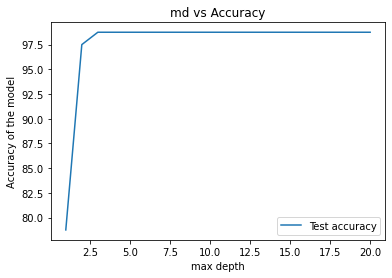

In [ ]:
md = [1,2,3,5,10,20]
acc4 = []
for i in range(len(md)):
  estimator = DecisionTreeClassifier(criterion='entropy',max_depth=md[i])
  model_dt  = estimator.fit(X_train_scaled, y_train)

  y_test_predicted_dt = model_dt.predict(X_test_scaled)

  acc_score_dt = accuracy_score(y_test, y_test_predicted_dt, normalize = True) * 100
  acc4.append(acc_score_dt)

plt.xlabel('max depth')
plt.ylabel('Accuracy of the model')
plt.title('md vs Accuracy')
plt.plot(md,acc4,label='Test accuracy')
plt.legend()
plt.show()

In [ ]:
estimator = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_dt  = estimator.fit(X_train_scaled, y_train)

y_test_predicted_dt = model_dt.predict(X_test_scaled)
print('Predicted values for Decision Tree classifier model: \n',y_test_predicted_dt)

cm_dt = confusion_matrix(y_test, y_test_predicted_dt)
print('Confusion matrix for Decision Tree classifier model: \n',cm_dt)

#classification report and accuracy score
cr_dt = classification_report(y_test, y_test_predicted_dt, target_names = ['4', '6','8'])
print('Classification Report for Decision Tree classifier model: \n',cr_dt)

acc_score_dt = accuracy_score(y_test, y_test_predicted_dt, normalize = True) * 100
print('Accuracy score for Decision Tree classifier model: ',acc_score_dt)

Predicted values for Decision Tree classifier model: 
 [4. 4. 6. 4. 6. 4. 4. 4. 4. 4. 4. 4. 4. 8. 8. 4. 6. 4. 8. 8. 8. 6. 6. 8.
 4. 8. 6. 4. 4. 4. 6. 8. 6. 6. 6. 4. 4. 4. 4. 8. 4. 4. 8. 8. 4. 8. 4. 8.
 8. 8. 4. 4. 4. 6. 4. 8. 4. 6. 4. 6. 6. 4. 4. 4. 8. 4. 4. 4. 8. 6. 8. 4.
 8. 4. 8. 4. 8. 4. 6. 4.]
Confusion matrix for Decision Tree classifier model: 
 [[41  0  0]
 [ 1 16  0]
 [ 0  0 22]]
Classification Report for Decision Tree classifier model: 
               precision    recall  f1-score   support

           4       0.98      1.00      0.99        41
           6       1.00      0.94      0.97        17
           8       1.00      1.00      1.00        22

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

Accuracy score for Decision Tree classifier model:  98.75


*Parameter justification:*
1. criterion 'entropy' gives better accuracy than criterion 'gini'
2. max_depth 3 till its maximum limit gives the best test accuracy

In [ ]:
x = pd.DataFrame(X_train_scaled,columns=['Displacement','Horsepower','Weight'])

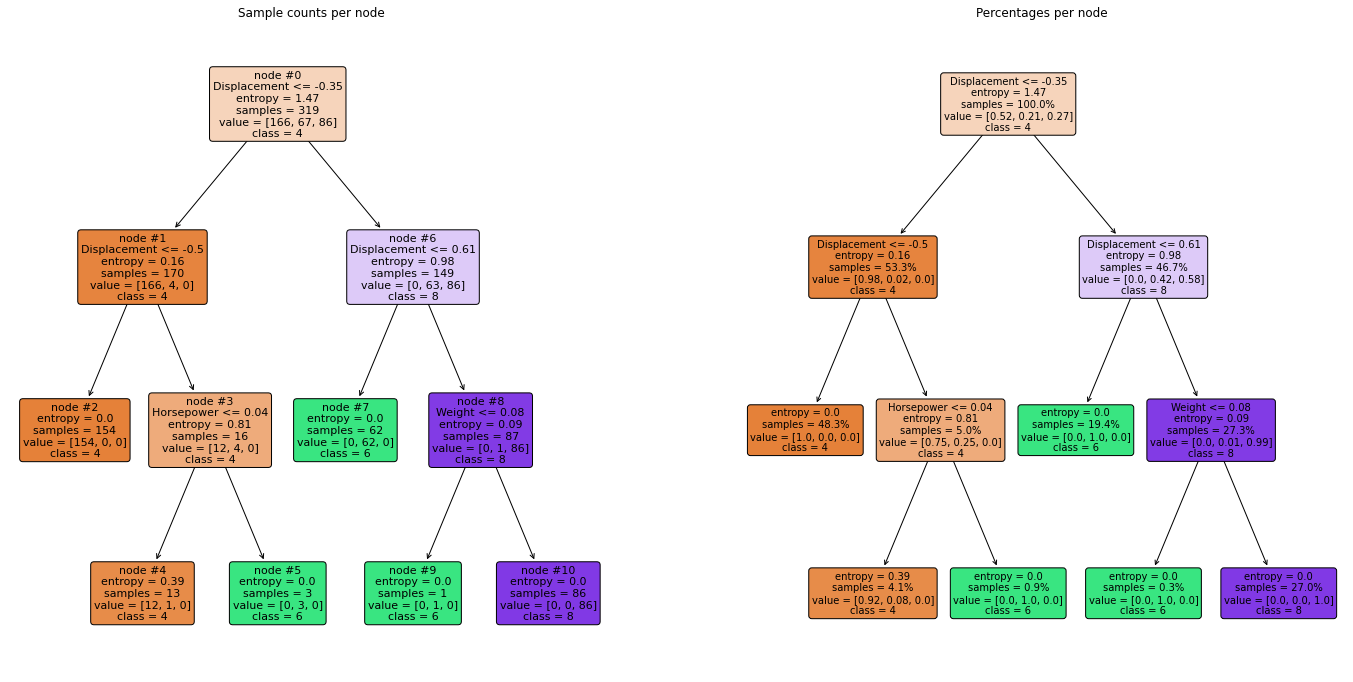

In [ ]:
estimator = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_dt  = estimator.fit(X_train_scaled, y_train)
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
axs1 = plot_tree(estimator, filled=True, feature_names = list(x.columns), class_names = ['4', '6','8'], rounded = True, precision = 2, node_ids=True)
fig_1_a.set_title('Sample counts per node')

fig_1_b = plt.subplot(122)
axs2 = plot_tree(estimator, filled=True, feature_names = list(x.columns), class_names = ['4', '6','8'], rounded = True, precision = 2, proportion=True)
fig_1_b.set_title('Percentages per node')

plt.show()

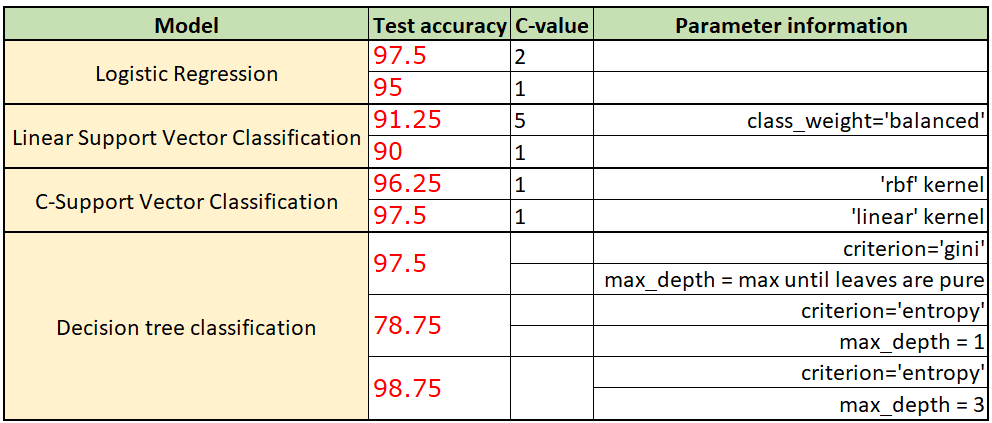

As shown above, many paramters were changed and models were compared on the basis of test accuracy. The Logistic Regression and C-SVC model test accuracies say that there is a linear separation of datapoints.The 3-D plot shown on the initial parts of the notebook also says that the data can be separated linearly.


We observe that rise in C-value, leads to a higher accuracy. A high C-value means lesser is the regularization and lesser is the mis-classification during training. The small volume of the dataset along with an efficient feature selection to promote clear class distinction, allowed the linear classification to perform better.


The behaviour of C-value can be understood in the C-CVC 'rbf' model graph. Here, the test accuracy against trainaccuracy, decreases after a particular value of C. This gives a sign of overfitting. For the initial values of C, the model behaves close to the linear separation and tries to fit the outliers as well.

##B.) REGRESSION

In [ ]:
def categorize(y):
  for i in range(len(y)):
    if y[i] < 5.0:
      y[i] = 4.0
    elif y[i] < 6.0:
      y[i] = 6.0
    elif y[i] < 7.0:
      y[i] = 6.0
    elif y[i] < 8.0:
      y[i] = 8.0
    else:
      y[i] = 8.0
  return y 

In [ ]:
y_test = np.array(y_test)

###1.) LASSO having least square regression

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [ ]:
y_test

array([4., 4., 6., 4., 6., 4., 4., 4., 4., 4., 4., 4., 4., 8., 8., 4., 6.,
       4., 8., 8., 8., 6., 6., 8., 4., 8., 6., 4., 4., 4., 6., 8., 6., 6.,
       6., 4., 4., 4., 4., 8., 4., 4., 8., 8., 6., 8., 4., 8., 8., 8., 4.,
       4., 4., 6., 4., 8., 4., 6., 4., 6., 6., 4., 4., 4., 8., 4., 4., 4.,
       8., 6., 8., 4., 8., 4., 8., 4., 8., 4., 6., 4.])

In [ ]:
#least square regression
reg = linear_model.LinearRegression()
model_lr = reg.fit(X_train_scaled,y_train)

y_test_predicted_lr = model_lr.predict(X_test_scaled)
print('Predicted value for Least square regression model: \n',y_test_predicted_lr)

y_corrected1 = categorize(y_test_predicted_lr)
print('Corrected Predicted value for Least square regression model: \n',y_test_predicted_lr)

test_rmse_lr = mean_squared_error(y_test, y_corrected1)
print('Root mean squared error for Least square regression model: \n',test_rmse_lr)

count = 0
for i in range(len(y_test)):
  if y_corrected1[i] == y_test[i]:
    count = count + 1

accuracy_score_lr = (count / len(y_test))*100
print('Accuracy for LASSO regression model: \n',accuracy_score_lr)

Predicted value for Least square regression model: 
 [4.23958412 4.64628857 5.06782985 3.65206777 5.09421753 3.89342606
 3.51503932 4.34474335 3.93341449 3.76976401 4.63112    4.79421695
 3.89342606 9.39757616 8.63888214 3.87482436 6.3882537  4.52040049
 7.68407337 7.23489577 7.91990679 5.24261005 5.54906619 7.38084806
 4.30202786 7.93066821 5.57200852 4.09362572 3.90069573 3.79044647
 6.45776967 7.92698546 4.85168019 6.07854626 6.47978868 3.8371715
 4.15566731 3.73367559 3.77886515 7.88210898 3.96731229 3.84913516
 7.12470049 8.66931478 4.71200647 8.67181478 3.99560376 7.91853335
 7.92900793 7.24683962 3.94198529 4.33198265 3.98638086 5.09911845
 3.93488343 7.43049421 3.93710029 5.54533738 4.07992642 6.06107788
 6.06922449 4.47984515 4.25896271 3.6587116  7.13565661 4.33049052
 4.67557121 4.86270492 8.51253362 6.47679218 9.12230942 4.65832454
 6.60054214 4.82758779 7.95591405 4.1815216  8.63262371 4.1154613
 6.40808968 3.83959918]
Corrected Predicted value for Least square regression 

In [ ]:
Lasso_Reg = linear_model.Lasso(alpha=0.5)
model_lr = Lasso_Reg.fit(X_train_scaled,y_train)

y_test_predicted_lr = model_lr.predict(X_test_scaled)
print('Predicted value for LASSO regression model: \n',y_test_predicted_lr)

y_corrected1 = categorize(y_test_predicted_lr)
print('Corrected Predicted value for LASSO regression model: \n',y_test_predicted_lr)

test_rmse_lr = mean_squared_error(y_test, y_corrected1)
print('Root mean squared error for LASSO regression model: \n',test_rmse_lr)

count = 0
for i in range(len(y_test)):
  if y_corrected1[i] == y_test[i]:
    count = count + 1

accuracy_score_lr = (count / len(y_test))*100
print('Accuracy for LASSO regression model: \n',accuracy_score_lr)

Predicted value for LASSO regression model: 
 [4.62918489 4.88965811 5.24780878 4.22762201 5.24780878 4.42297692
 4.1407976  4.67259709 4.43382998 4.30359337 4.88965811 5.00904167
 4.42297692 8.29751605 7.71145131 4.34700557 6.08349369 4.83539285
 7.06026826 6.68041148 7.16879877 5.33463319 5.5299881  6.82150114
 4.69430319 7.17965182 5.54084115 4.53150743 4.42297692 4.29274032
 6.1703181  7.16879877 5.06330692 5.87728573 6.08349369 4.34700557
 4.56406658 4.29274032 4.30359337 7.16879877 4.43382998 4.35785862
 6.66955843 7.71145131 4.95477641 7.71145131 4.42297692 7.17965182
 7.16879877 6.68041148 4.43382998 4.67259709 4.43382998 5.19354353
 4.42297692 6.82150114 4.42297692 5.51913505 4.54236048 5.81216742
 5.88813878 4.7811276  4.66174404 4.22762201 6.70211758 4.67259709
 4.88965811 5.06330692 7.71145131 6.1703181  8.02618978 4.88965811
 6.1920242  5.00904167 7.27732927 4.58577269 7.71145131 4.54236048
 6.08349369 4.35785862]
Corrected Predicted value for LASSO regression model: 
 [4.

The Least square regression model is a special case of Lasso regression model where the value of alpha is 0. It is not advised to use a Lasso model with alpha = 0, so we compute the test accuracy for linear regression model.

We observe that the Lasso model with alpha equal to 0.5 gives a lesser test accuracy than the linear regression model as it a penalty to the cost function. The alpha was kept not less than 0.5 to show a difference in accuracy between the two models.

###2.) SVR model

In [ ]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
model_svr = svr_reg.fit(X_train_scaled,y_train)

y_test_predicted_svr = model_svr.predict(X_test_scaled)
print('Predicted value for SVR regression model: \n',y_test_predicted_svr)

y_corrected2 = categorize(y_test_predicted_svr)
print('Corrected Predicted value for SVR regression model: \n',y_corrected2)

test_rmse_svr = mean_squared_error(y_test, y_corrected2)
print('Root mean squared error for SVR regression model: \n',test_rmse_svr)

count = 0
for i in range(len(y_test)):
  if y_corrected2[i] == y_test[i]:
    count = count + 1

accuracy_score_svr = (count / len(y_test))*100
print('Accuracy for SVR regression model: \n',accuracy_score_svr)

Predicted value for SVR regression model: 
 [3.93688406 4.09347601 4.96915608 3.98945937 4.86583542 3.97005816
 4.06800963 3.94853297 3.92390558 3.96643733 4.08030076 4.22723349
 3.97005816 8.00657377 7.93571288 4.04798794 6.61075871 4.05975808
 8.07107813 7.84164962 8.11414844 5.0603179  5.07835414 8.07240432
 3.99461283 8.10147723 5.04751531 3.91585195 4.01159875 4.01940785
 6.71491717 8.11043993 4.53879804 6.22443282 6.01259734 3.91238319
 3.83836077 3.9922255  3.95018075 8.06407806 3.95412796 3.93109531
 7.99034507 7.94715318 4.20958461 7.93554797 4.00898705 8.10281399
 8.10939085 7.94435894 3.92405707 3.93510556 3.95687093 5.47207052
 3.96216463 8.04992956 3.88043938 5.14986454 3.90221197 5.83254145
 5.96602173 4.13408624 3.94002581 4.03873618 7.88659687 3.91627812
 4.13116629 4.31137253 8.03901254 7.01117216 7.95744033 4.11408957
 6.81144286 4.26511925 8.03662334 3.84901955 8.00359113 3.90585589
 6.16412251 4.02543468]
Corrected Predicted value for SVR regression model: 
 [4. 4. 

In [ ]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='linear')
model_svr = svr_reg.fit(X_train_scaled,y_train)

y_test_predicted_svr = model_svr.predict(X_test_scaled)
print('Predicted value for SVR regression model: \n',y_test_predicted_svr)

y_corrected2 = categorize(y_test_predicted_svr)
print('Corrected Predicted value for SVR regression model: \n',y_corrected2)

test_rmse_svr = mean_squared_error(y_test, y_corrected2)
print('Root mean squared error for SVR regression model: \n',test_rmse_svr)

count = 0
for i in range(len(y_test)):
  if y_corrected2[i] == y_test[i]:
    count = count + 1

accuracy_score_svr = (count / len(y_test))*100
print('Accuracy for SVR regression model: \n',accuracy_score_svr)

Predicted value for SVR regression model: 
 [4.23188089 4.53895554 5.10594148 3.63219968 5.09699442 3.88880234
 3.5184451  4.24774935 3.91792738 3.75657902 4.56071717 4.75778762
 3.88880234 9.59412584 8.74099776 3.86510174 6.33885561 4.54149755
 7.81215565 7.22168759 7.96293052 5.20600956 5.6062824  7.41975496
 4.32012371 7.94147379 5.64251661 4.07913526 3.93619313 3.76183481
 6.56103125 7.95277509 4.77246318 6.01864938 6.4272516  3.78613397
 4.04145789 3.73920489 3.74352204 7.90151677 3.96759021 3.82077269
 7.22390075 8.7262476  4.63406512 8.86721161 3.93880162 7.9588831
 7.94987354 7.14673206 3.92875936 4.2602745  3.95757949 4.83095119
 3.95074791 7.37744007 3.88396521 5.54248346 4.03495093 5.88901061
 6.13008152 4.29441209 4.19758988 3.67470631 7.03979637 4.23928709
 4.55204608 4.84915892 8.63316283 6.47592029 9.11028348 4.6142005
 6.43667898 4.70991203 7.90891452 4.07906066 8.69215619 4.08804713
 6.43760241 3.88649174]
Corrected Predicted value for SVR regression model: 
 [4. 4. 6.

Similar to the classification problem, the 'linear' kernel yields a better test accuracy than the 'rbf' model in regression analysis.

###3.) Regression trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=1)
model_dtr = dt_reg.fit(X_train_scaled,y_train)

y_test_predicted_dtr = model_dtr.predict(X_test_scaled)
print('Predicted value for Decision tree regression model: \n',y_test_predicted_dtr)

y_corrected3 = categorize(y_test_predicted_dtr)
print('Corrected Predicted value for Decision tree regression model: \n',y_corrected3)

test_rmse_dtr = mean_squared_error(y_test, y_corrected3)
print('Root mean squared error for Decision tree regression model: \n',test_rmse_dtr)

count = 0
for i in range(len(y_test)):
  if y_corrected3[i] == y_test[i]:
    count = count + 1

accuracy_score_dtr = (count / len(y_test))*100
print('Accuracy for Decision tree regression model: \n',accuracy_score_dtr)

Predicted value for Decision tree regression model: 
 [4.04705882 4.04705882 7.15436242 4.04705882 7.15436242 4.04705882
 4.04705882 4.04705882 4.04705882 4.04705882 4.04705882 4.04705882
 4.04705882 7.15436242 7.15436242 4.04705882 7.15436242 4.04705882
 7.15436242 7.15436242 7.15436242 7.15436242 7.15436242 7.15436242
 4.04705882 7.15436242 7.15436242 4.04705882 4.04705882 4.04705882
 7.15436242 7.15436242 4.04705882 7.15436242 7.15436242 4.04705882
 4.04705882 4.04705882 4.04705882 7.15436242 4.04705882 4.04705882
 7.15436242 7.15436242 4.04705882 7.15436242 4.04705882 7.15436242
 7.15436242 7.15436242 4.04705882 4.04705882 4.04705882 7.15436242
 4.04705882 7.15436242 4.04705882 7.15436242 4.04705882 7.15436242
 7.15436242 4.04705882 4.04705882 4.04705882 7.15436242 4.04705882
 4.04705882 4.04705882 7.15436242 7.15436242 7.15436242 4.04705882
 7.15436242 4.04705882 7.15436242 4.04705882 7.15436242 4.04705882
 7.15436242 4.04705882]
Corrected Predicted value for Decision tree regress

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=3)
model_dtr = dt_reg.fit(X_train_scaled,y_train)

y_test_predicted_dtr = model_dtr.predict(X_test_scaled)
print('Predicted value for Decision tree regression model: \n',y_test_predicted_dtr)

y_corrected3 = categorize(y_test_predicted_dtr)
print('Corrected Predicted value for Decision tree regression model: \n',y_corrected3)

test_rmse_dtr = mean_squared_error(y_test, y_corrected3)
print('Root mean squared error for Decision tree regression model: \n',test_rmse_dtr)

count = 0
for i in range(len(y_test)):
  if y_corrected3[i] == y_test[i]:
    count = count + 1

accuracy_score_dtr = (count / len(y_test))*100
print('Accuracy for Decision tree regression model: \n',accuracy_score_dtr)

Predicted value for Decision tree regression model: 
 [4.         4.         6.         4.         6.         4.
 4.         4.         4.         4.         4.         4.28571429
 4.         8.         8.         4.         6.         4.
 8.         8.         8.         6.         6.         8.
 4.         8.         6.         4.         4.         4.
 6.         8.         4.28571429 6.         6.         4.
 4.         4.         4.         8.         4.         4.
 8.         8.         4.28571429 8.         4.         8.
 8.         8.         4.         4.         4.         6.
 4.         8.         4.         6.         4.         6.
 6.         4.         4.         4.         8.         4.
 4.         4.28571429 8.         6.         8.         4.
 8.         4.28571429 8.         4.         8.         4.
 6.         4.        ]
Corrected Predicted value for Decision tree regression model: 
 [4. 4. 6. 4. 6. 4. 4. 4. 4. 4. 4. 4. 4. 8. 8. 4. 6. 4. 8. 8. 8. 6. 6. 8.
 4. 8. 6. 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=200)
model_dtr = dt_reg.fit(X_train_scaled,y_train)

y_test_predicted_dtr = model_dtr.predict(X_test_scaled)
print('Predicted value for Decision tree regression model: \n',y_test_predicted_dtr)

y_corrected3 = categorize(y_test_predicted_dtr)
print('Corrected Predicted value for Decision tree regression model: \n',y_corrected3)

test_rmse_dtr = mean_squared_error(y_test, y_corrected3)
print('Root mean squared error for Decision tree regression model: \n',test_rmse_dtr)

count = 0
for i in range(len(y_test)):
  if y_corrected3[i] == y_test[i]:
    count = count + 1

accuracy_score_dtr = (count / len(y_test))*100
print('Accuracy for Decision tree regression model: \n',accuracy_score_dtr)

Predicted value for Decision tree regression model: 
 [4. 4. 6. 4. 6. 4. 4. 4. 4. 4. 4. 4. 4. 8. 8. 4. 6. 4. 8. 8. 8. 6. 6. 8.
 4. 8. 6. 4. 4. 4. 6. 8. 6. 6. 6. 4. 4. 4. 4. 8. 4. 4. 8. 8. 4. 8. 4. 8.
 8. 8. 4. 4. 4. 6. 4. 8. 4. 6. 4. 6. 6. 4. 4. 4. 8. 4. 4. 4. 8. 6. 8. 4.
 8. 4. 8. 4. 8. 4. 6. 4.]
Corrected Predicted value for Decision tree regression model: 
 [4. 4. 6. 4. 6. 4. 4. 4. 4. 4. 4. 4. 4. 8. 8. 4. 6. 4. 8. 8. 8. 6. 6. 8.
 4. 8. 6. 4. 4. 4. 6. 8. 6. 6. 6. 4. 4. 4. 4. 8. 4. 4. 8. 8. 4. 8. 4. 8.
 8. 8. 4. 4. 4. 6. 4. 8. 4. 6. 4. 6. 6. 4. 4. 4. 8. 4. 4. 4. 8. 6. 8. 4.
 8. 4. 8. 4. 8. 4. 6. 4.]
Root mean squared error for Decision tree regression model: 
 0.05
Accuracy for Decision tree regression model: 
 98.75


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=5000)
model_dtr = dt_reg.fit(X_train_scaled,y_train)

y_test_predicted_dtr = model_dtr.predict(X_test_scaled)
print('Predicted value for Decision tree regression model: \n',y_test_predicted_dtr)

y_corrected3 = categorize(y_test_predicted_dtr)
print('Corrected Predicted value for Decision tree regression model: \n',y_corrected3)

test_rmse_dtr = mean_squared_error(y_test, y_corrected3)
print('Root mean squared error for Decision tree regression model: \n',test_rmse_dtr)

count = 0
for i in range(len(y_test)):
  if y_corrected3[i] == y_test[i]:
    count = count + 1

accuracy_score_dtr = (count / len(y_test))*100
print('Accuracy for Decision tree regression model: \n',accuracy_score_dtr)

Predicted value for Decision tree regression model: 
 [4. 4. 6. 4. 6. 4. 4. 4. 4. 4. 4. 4. 4. 8. 8. 4. 6. 4. 8. 8. 8. 6. 6. 8.
 4. 8. 6. 4. 4. 4. 6. 8. 4. 6. 6. 4. 4. 4. 4. 8. 4. 4. 8. 8. 4. 8. 4. 8.
 8. 8. 4. 4. 4. 6. 4. 8. 4. 6. 4. 6. 6. 4. 4. 4. 8. 4. 4. 4. 8. 6. 8. 4.
 8. 4. 8. 4. 8. 4. 6. 4.]
Corrected Predicted value for Decision tree regression model: 
 [4. 4. 6. 4. 6. 4. 4. 4. 4. 4. 4. 4. 4. 8. 8. 4. 6. 4. 8. 8. 8. 6. 6. 8.
 4. 8. 6. 4. 4. 4. 6. 8. 4. 6. 6. 4. 4. 4. 4. 8. 4. 4. 8. 8. 4. 8. 4. 8.
 8. 8. 4. 4. 4. 6. 4. 8. 4. 6. 4. 6. 6. 4. 4. 4. 8. 4. 4. 4. 8. 6. 8. 4.
 8. 4. 8. 4. 8. 4. 6. 4.]
Root mean squared error for Decision tree regression model: 
 0.1
Accuracy for Decision tree regression model: 
 97.5


Similar to the Decision tree classification, the regression trees give a high accuracy when the max_depth keeps increasing, which overfits after a point.

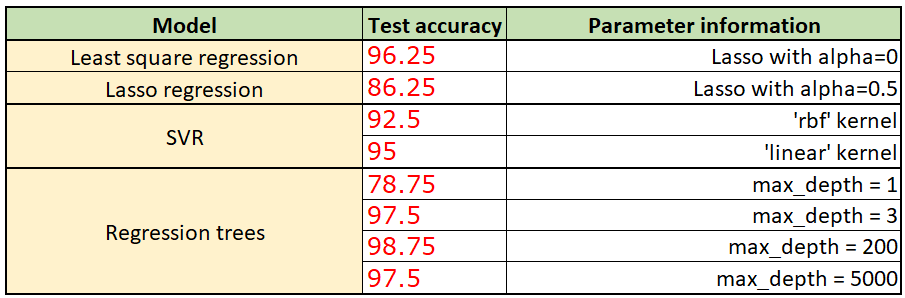